In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import optimize
import numpy as np

from scipy.optimize import curve_fit
from scipy.stats import  gmean,norm

%matplotlib inline
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['axes.labelsize'] = 7

In [2]:
def hex_to_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

In [3]:
def generate_cmap (color):
    from matplotlib.colors import ListedColormap
    N = 256
    vals = np.ones((N, 4))
    vals[:, 0] = np.linspace(1,color[0]/256, N)
    vals[:, 1] = np.linspace(1,color[1]/256, N)
    vals[:, 2] = np.linspace(1,color[2]/256, N)
    newcmp = ListedColormap(vals)
    return newcmp

In [4]:
colors = {'animals':'ff6666','archaea':'9372b2','bacteria':'ff9e69','fungi':'ffe995','plants':'5cb15c','protists':'5f8dd3','viruses':'ababab'}

In [6]:
run = '20190829'
data = pd.read_csv('agg_data.csv',index_col=0)
data_with_color = pd.concat([data,(pd.DataFrame.from_dict(colors,orient='index',columns=['color']))],axis=1,sort=False)
data_with_color['log biomass'] = np.log(data_with_color['Biomass'])
data_with_color['bottom'] = data_with_color['log biomass'] - np.log(data_with_color['Uncertainty'])
data_with_color.sort_values(by='log biomass',ascending=False,inplace=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


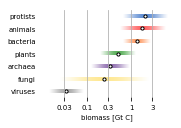

In [7]:
fig, ax = plt.subplots(figsize=(2.3,1.6))

bar = ax.barh(np.arange(data_with_color.shape[0])[::-1],width = 2*np.log(data_with_color['Uncertainty']),left=data_with_color['bottom'],height=0.3)
plt.tick_params(axis='y', which='both', right=False, left=False)

plt.gca().spines['left'].set_visible(False)

def gradientbars(bars,data):
    x = np.linspace(norm.ppf(0.05),norm.ppf(0.95), 1e3)
    vals = norm.pdf(x)/norm.pdf(x).max()
    
    grad = np.atleast_2d(vals)
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar,c in zip(bars,data['color']):
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ycmp = generate_cmap(hex_to_rgb(c))
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0,cmap=ycmp)
    ax.axis(lim)

gradientbars(bar,data_with_color)
ax.set_xticks(np.log([0.03,0.1,0.3,1,3]))
ax.set_xticklabels([0.03,0.1,0.3,1,3])
ax.set_xlim(np.log([0.01,8]))
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels(data_with_color.index.values[::-1])
ax.scatter(np.arange(data_with_color.shape[0])[::-1],y=data_with_color['log biomass'])
ax.scatter(data_with_color['log biomass'],np.arange(data_with_color.shape[0])[::-1],c='w',edgecolors='k',s=10,linewidths=1)
ax.set_xlabel('biomass [Gt C]')
ax.xaxis.grid() # vertical lines

plt.box(on=None)
plt.gca().spines['left'].set_visible(False)
plt.savefig('fig1b_'+run+'.eps',dpi=300)
plt.savefig('fig1b_'+run+'.svg',dpi=300)
plt.savefig('fig1b_'+run+'.png',dpi=300)